In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\Aravind\machine learning project 1\Cleanes student performance.xlsx")
df

,Unnamed: 0,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0,7,99,1,9,1,91
1,1,4,82,0,4,2,65
2,2,8,51,1,7,2,45
3,3,5,52,1,5,2,36
4,4,7,75,0,8,5,66
...,...,...,...,...,...,...,...
9995,9995,1,49,1,4,2,23
9996,9996,7,64,1,8,5,58
9997,9997,6,83,1,8,5,74
9998,9998,9,97,1,7,0,95


In [3]:
df.drop(columns="Unnamed: 0")

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


**X and Y**

In [4]:
x=x=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

**Random state**

In [5]:
train=[]
test=[]
cv=[]

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state =i)

    from sklearn.linear_model import LinearRegression
    l = LinearRegression()
    l.fit(x_train,y_train)
    
    train_score = l.score(x_train,y_train)
    test_score = l.score(x_test,y_test)
    
    train.append(train_score)
    test.append(test_score)
    
#    y_pred_train = l.predict(x_train,y_train)
 #   y_pred_test = l.predict(x_test,y_test)

 #   train.append(l.score(y_pred_train))
  #  test.append(l.score(y_pred_test))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(l,x_train,y_train,cv=5,scoring="r2").mean())
    
em = pd.DataFrame({"train": train,"test": test,"cv":cv})
gm = em[(abs(em["train"]-em["test"])<=0.05)&(abs(em["test"]-em["cv"])<=0.05)]
print("best_random_number:",gm[gm["cv"]==gm["cv"].max()].index.to_list()[0])

best_random_number: 63


**Train-Test-split**

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=63)

# Modelling

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: -34.21233691016566
Coefficients: [9.40532746e-06 2.85713154e+00 1.01887652e+00 5.71088595e-01
 4.88359555e-01 1.97545870e-01]


# Evalution

In [8]:
#prediction on train data
ypred_train=model.predict(x_train)

#Evalutin on train data
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

#cross validation on trai data
from sklearn.model_selection import cross_val_score
print("cross validation score:",cross_val_score(model,x_train,y_train,cv=5).mean())

#Prediction on test data
ypred_test=model.predict(x_test)

from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Train R2: 0.9889747858535893
cross validation score: 0.9889249755699767
Test R2: 0.9878469537127567


In [9]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.8,random_state=63)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~x_train",data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.195e+05
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:25   Log-Likelihood:                -16963.
No. Observations:                8000   AIC:                         3.394e+04
Df Residuals:                    7993   BIC:                         3.399e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.2123      0.146   -235.124      0.000     -34.498     -33.927
x_train[0]  9.405e-06   7.81e-06      1.205      0.228    -5.9e-06    2.47e-05
x_train[1]     2.8571      0.009    328.256      0.000       2.840       2.874
x_train[2]     1.0189      0.001    782.098      0.000       1.016       1.021
x_train[3]     0.5711      0.045     12.653      0.000       0.483       0.660
x_train[4]     0.4884      0.013     36.834      0.000       0.462       0.514
x_train[5]     0.1975      0.008     25.125      0.000       0.182       0.213
==============================================================================
Omnibus:                        2.496   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.555
Skew:                          -0.011   Prob(JB):                        0.279
Kurtosis:                       3.085   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

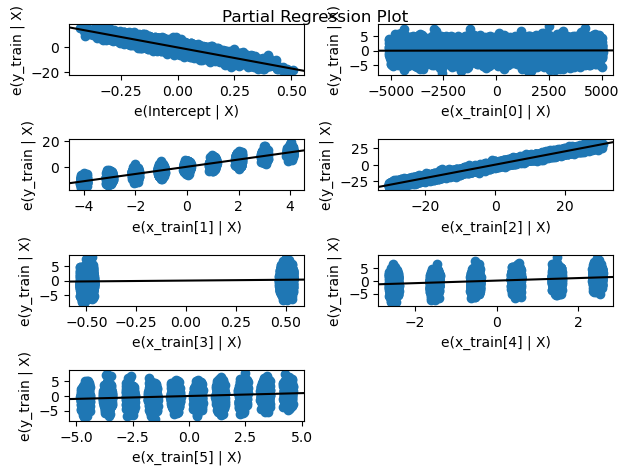

In [10]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

**Check for Influential Records**

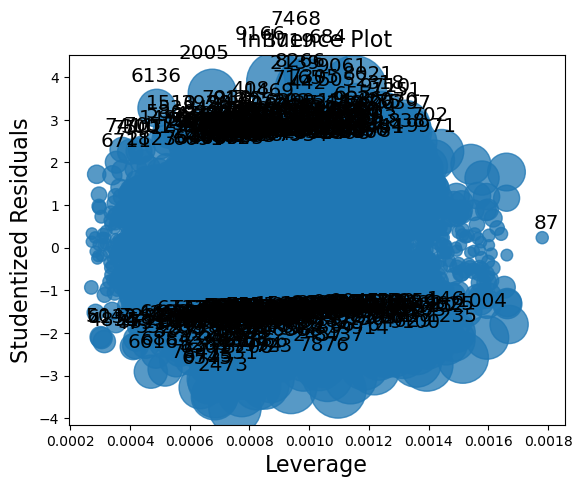

In [11]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [12]:
#drop the influential Records
df.drop(index=[6136,9166,2005,7468,87,2473],inplace=True)

x=x=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=63)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

ypred_train=model.predict(x_train)
print("Train R2:",r2_score(y_train,ypred_train))
print("cross validation score:",cross_val_score(model,x_train,y_train,cv=5).mean())

ypred_test=model.predict(x_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -34.10595221073223
Coefficients: [2.63193561e-06 2.85736569e+00 1.01835461e+00 6.35652335e-01
 4.79961568e-01 1.93224715e-01]
Train R2: 0.9889080803654002
cross validation score: 0.9888591376932141
Test R2: 0.9884619404750932


In [13]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.8,random_state=63)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~x_train",data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.187e+05
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:38   Log-Likelihood:                -17017.
No. Observations:                7995   AIC:                         3.405e+04
Df Residuals:                    7988   BIC:                         3.410e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.1060      0.146   -233.964      0.000     -34.392     -33.820
x_train[0]  2.632e-06   7.89e-06      0.334      0.739   -1.28e-05    1.81e-05
x_train[1]     2.8574      0.009    325.676      0.000       2.840       2.875
x_train[2]     1.0184      0.001    776.793      0.000       1.016       1.021
x_train[3]     0.6357      0.046     13.967      0.000       0.546       0.725
x_train[4]     0.4800      0.013     35.883      0.000       0.454       0.506
x_train[5]     0.1932      0.008     24.296      0.000       0.178       0.209
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.077
Skew:                           0.004   Prob(JB):                        0.962
Kurtosis:                       3.013   Cond. No.                     3.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#drop Hours studied
df.drop(columns=["Hours Studied"],inplace=True)

x=x=df.drop("Performance Index",axis=1)
y=df["Performance Index"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=63)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

ypred_train=model.predict(x_train)
print("Train R2:",r2_score(y_train,ypred_train))
print("cross validation score:",cross_val_score(model,x_train,y_train,cv=5).mean())

ypred_test=model.predict(x_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: -20.508895154504927
Coefficients: [2.94335182e-05 1.01691664e+00 7.06679102e-01 5.20938199e-01
 2.65157679e-01]
Train R2: 0.8416289747751471
cross validation score: 0.8411211632086847
Test R2: 0.8390808773553653


In [15]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.8,random_state=63)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~x_train",data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     8491.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:40:38   Log-Likelihood:                -27645.
No. Observations:                7995   AIC:                         5.530e+04
Df Residuals:                    7989   BIC:                         5.534e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.5089      0.528    -38.863      0.000     -21.543     -19.474
x_train[0]  2.943e-05   2.98e-05      0.987      0.324    -2.9e-05    8.79e-05
x_train[1]     1.0169      0.005    205.299      0.000       1.007       1.027
x_train[2]     0.7067      0.172      4.110      0.000       0.370       1.044
x_train[3]     0.5209      0.051     10.308      0.000       0.422       0.620
x_train[4]     0.2652      0.030      8.827      0.000       0.206       0.324
==============================================================================
Omnibus:                     2627.402   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.898
Skew:                           0.004   Prob(JB):                     8.72e-83
Kurtosis:                       1.935   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final model

It includes columns=Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced

Train R2: 0.8416289747751471
    
cross validation score: 0.8411211632086847
    
Test R2: 0.8390808773553653